# Imports

In [46]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
from ipywidgets import Box, Button, Text
import asyncio
from IPython.core.display import display
from IPython.display import clear_output

/tmp/ipykernel_24781/3818270030.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [47]:
root_dir = "/media/hdd/Datasets/Landscapes"
path=Path(root_dir)/"sorted"

In [48]:
new_path = Path(root_dir)/"temporary_acceptance"

In [49]:
files= glob.glob(str(path)+"*/*/*")

# Setting Up Data

In [50]:
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=RandomResizedCrop(128, min_scale=0.5),
   batch_tfms=aug_transforms(),
   )

In [51]:
dls = fields.dataloaders(path,bs = 5)

In [52]:
dls.vocab

['Animals', 'Architecture', 'Armor', 'Desert', 'Fields', 'Flowers', 'Food', 'Forest', 'Mech', 'Mountain', 'People', 'Statues', 'Water', 'birds']

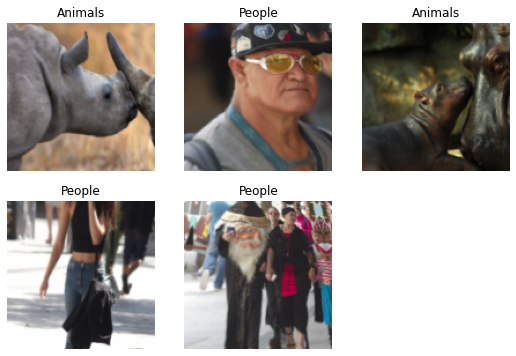

In [53]:
dls.show_batch()

# Training Pipeline 

## First Train

In [ ]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

In [54]:
objs = iter(os.listdir(Path(root_dir)/"unlabelled"))

In [55]:
def one_batch(learn, iterator, no_items = 10):
    # return [learn.predict(os.listdir(Path(root_dir)/"unlabelled"/next(iterator))) for _ in range(no_items)]
    return [(item,learn.predict(item)) for item in [Path(root_dir)/"unlabelled"/next(iterator) for _ in range(no_items)]]
def wait_for_change(widget):
    future = loop.create_future()
    def getvalue(change):
        future.set_result(change.description)
        widget.on_click(getvalue, remove=True) 
    widget.on_click(getvalue)
    return future

async def f(dict_res, paths, labels):
    for i,path in enumerate(paths):

        display(Image.open(paths[i]).resize((128,128)))
        selected = widgets.Select(
            options = ["Keep"] + list(dls.vocab),
            description = labels[i]
        )

        display(Box([selected, button]))
        x = await wait_for_change(button)

        if selected.value == "Keep":
            dict_res[paths[i]] = labels[i]
            # print(new_path/labels[i])
            # shutil.copy(path, new_path/labels[i])
        else:
            dict_res[paths[i]] = selected.value
        clear_output(wait=True)


# Round 1

In [56]:
def continue_train():
   fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
      get_items=get_image_files,
      get_y=parent_label,
      splitter=RandomSplitter(valid_pct=0.2, seed=42),
      item_tfms=RandomResizedCrop(128, min_scale=0.5),
      batch_tfms=aug_transforms(),
      )
   dls = fields.dataloaders(path,bs = 5)
   learn = vision_learner(dls, resnet34 , metrics = [error_rate, accuracy])
   learn.load("part1")
   learn.fine_tune(4,base_lr=0.001)
   learn.save("part1")
   return learn

In [57]:
learn = continue_train()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.318675,0.297922,0.074738,0.925262,00:50


/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.319232,0.264835,0.065770,0.934230,00:58
1,0.325897,0.333727,0.079223,0.920777,01:01
2,0.290566,0.280776,0.064275,0.935725,01:01
3,0.203755,0.308735,0.077728,0.922272,01:03


/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


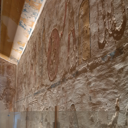

Box(children=(Select(description='Mountain', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'F…

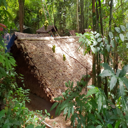

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

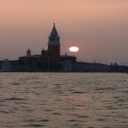

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

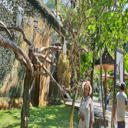

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

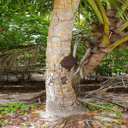

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

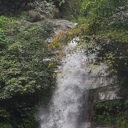

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

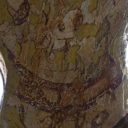

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

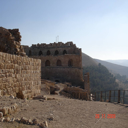

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

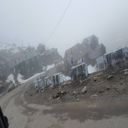

Box(children=(Select(description='Mountain', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'F…

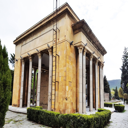

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

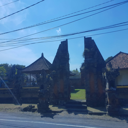

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

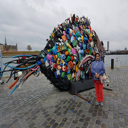

Box(children=(Select(description='Mech', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Field…

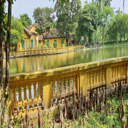

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

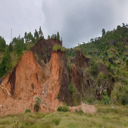

Box(children=(Select(description='Mountain', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'F…

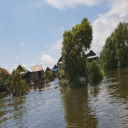

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

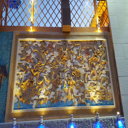

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

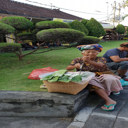

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

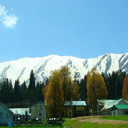

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

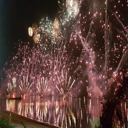

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

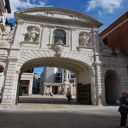

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

In [58]:

objs = iter(os.listdir(Path(root_dir)/"unlabelled"))
res = one_batch(learn, objs, 20)
new_path = Path(root_dir)/"temporary_acceptance"
paths,labels = [x[0] for x in res] , [x[1][0] for x in res]
loop = asyncio.get_running_loop()
button = Button(description='Submit')

dict_res = {}
asyncio.create_task(f(dict_res, paths, labels))
for i in dict_res.keys():
   label = dict_res[i]
   if not Path.exists(new_path/label): # sorted label
      os.mkdir(new_path/label)

   if not Path.exists(new_path/label): # add to training set
      os.mkdir(new_path/label)

   shutil.copy(i, path/label) #copying to the train set for next time
   shutil.move(i, new_path/label) #copying to the new_path

print("moved")

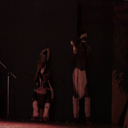

Box(children=(Select(description='People', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

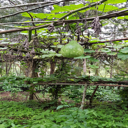

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

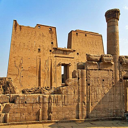

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

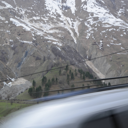

Box(children=(Select(description='Mountain', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'F…

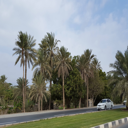

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

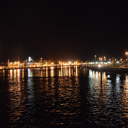

Box(children=(Select(description='Water', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fiel…

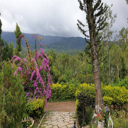

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

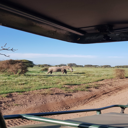

Box(children=(Select(description='Fields', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

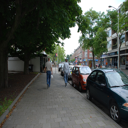

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

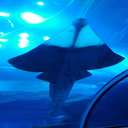

Box(children=(Select(description='Animals', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fi…

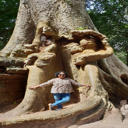

Box(children=(Select(description='People', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

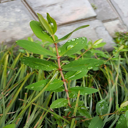

Box(children=(Select(description='Flowers', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fi…

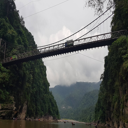

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

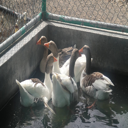

Box(children=(Select(description='Animals', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fi…

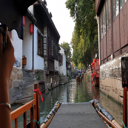

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

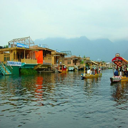

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

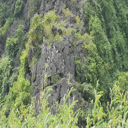

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

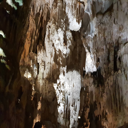

Box(children=(Select(description='Mountain', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'F…

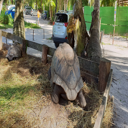

Box(children=(Select(description='Animals', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fi…

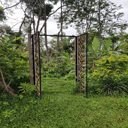

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

In [59]:

res = one_batch(learn, objs, 20)
new_path = Path(root_dir)/"temporary_acceptance"
paths,labels = [x[0] for x in res] , [x[1][0] for x in res]
loop = asyncio.get_running_loop()
button = Button(description='Submit')

dict_res = {}
asyncio.create_task(f(dict_res, paths, labels))
for i in dict_res.keys():
   label = dict_res[i]
   if not Path.exists(new_path/label): # sorted label
      os.mkdir(new_path/label)

   if not Path.exists(new_path/label): # add to training set
      os.mkdir(new_path/label)

   shutil.copy(i, path/label) #copying to the train set for next time
   shutil.move(i, new_path/label) #copying to the new_path
print("moved")

# Round 3

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.271006,0.346040,0.091181,0.908819,00:54


/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.399560,0.285488,0.085202,0.914798,00:59
1,0.317160,0.406680,0.088191,0.911809,01:02
2,0.204978,0.273594,0.065770,0.934230,01:02
3,0.280275,0.252097,0.058296,0.941704,01:05


/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


moved


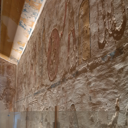

Box(children=(Select(description='Mountain', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'F…

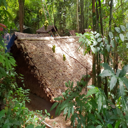

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

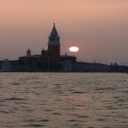

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

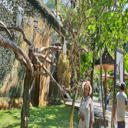

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

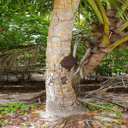

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

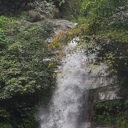

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

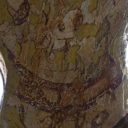

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

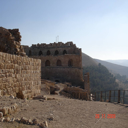

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

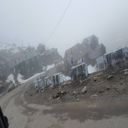

Box(children=(Select(description='Mountain', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'F…

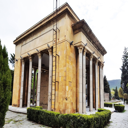

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

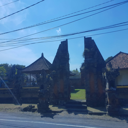

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

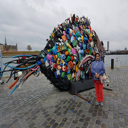

Box(children=(Select(description='Mech', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Field…

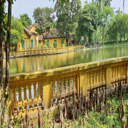

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

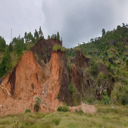

Box(children=(Select(description='Mountain', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'F…

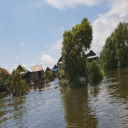

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

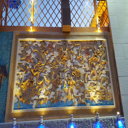

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

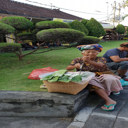

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

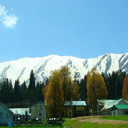

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

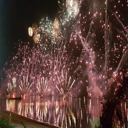

Box(children=(Select(description='Forest', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fie…

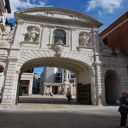

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

In [60]:
continue_train()


/media/hdd/Datasets/Landscapes/unlabelled/trip 689.jpg


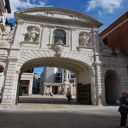

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

In [66]:

objs = iter(os.listdir(Path(root_dir)/"unlabelled"))
res = one_batch(learn, objs, 20)
new_path = Path(root_dir)/"temporary_acceptance"
paths,labels = [x[0] for x in res] , [x[1][0] for x in res]
loop = asyncio.get_running_loop()
button = Button(description='Submit')

dict_res = {}
async def f(dict_res, paths, labels):
    for i,path in enumerate(paths):
      print(paths[i])
      display(Image.open(paths[i]).resize((128,128)))
      selected = widgets.Select(
         options = ["Keep"] + list(dls.vocab),
         description = labels[i]
      )

      display(Box([selected, button]))
      x = await wait_for_change(button)

      if selected.value == "Keep":
         dict_res[paths[i]] = labels[i]
         # print(new_path/labels[i])
         # shutil.copy(path, new_path/labels[i])
      else:
         dict_res[paths[i]] = selected.value
      clear_output(wait=True)
asyncio.create_task(f(dict_res, paths, labels))


In [69]:

for i in dict_res.keys():
   label = dict_res[i]
   if not Path.exists(new_path/label): # sorted label
      os.mkdir(new_path/label)

   if not Path.exists(new_path/label): # add to training set
      os.mkdir(new_path/label)
   try:
      shutil.copy(i, path/label) #copying to the train set for next time
   except Exception as e:
      pass
   try:
      shutil.move(i, new_path/label) #copying to the new_path
   except Exception as e:
      pass
   try:
      os.unlink
   except Exception as e:
      pass

print("moved")

moved


/media/hdd/Datasets/Landscapes/unlabelled/20190809_131431.jpg


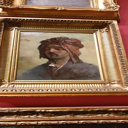

Box(children=(Select(description='Animals', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert', 'Fi…

In [82]:

objs = iter(os.listdir(Path(root_dir)/"unlabelled"))
res = one_batch(learn, objs, 20)
new_path = Path(root_dir)/"temporary_acceptance"
paths,labels = [x[0] for x in res] , [x[1][0] for x in res]
loop = asyncio.get_running_loop()
button = Button(description='Submit')

dict_res = {}
async def f(dict_res, paths, labels):
    for i,path in enumerate(paths):
      print(paths[i])
      display(Image.open(paths[i]).resize((128,128)))
      selected = widgets.Select(
         options = ["Keep"] + list(dls.vocab),
         description = labels[i]
      )

      display(Box([selected, button]))
      x = await wait_for_change(button)

      if selected.value == "Keep":
         dict_res[paths[i]] = labels[i]
         # print(new_path/labels[i])
         # shutil.copy(path, new_path/labels[i])
      else:
         dict_res[paths[i]] = selected.value
      clear_output(wait=True)
asyncio.create_task(f(dict_res, paths, labels))


In [83]:

for i in dict_res.keys():
   label = dict_res[i]
   if not Path.exists(new_path/label): # sorted label
      os.mkdir(new_path/label)

   if not Path.exists(new_path/label): # add to training set
      os.mkdir(new_path/label)
   try:
      shutil.copy(i, path/label) #copying to the train set for next time
   except Exception as e:
      print("copy",e)
   try:
      shutil.move(i, new_path/label) #copying to the new_path
      # print("moved")
   except Exception as e:

      print("move",e)
   try:
      os.unlink(i)
      # print("removed")
   except Exception as e:
      print("rem", e)


rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/IMG-20170627-WA0047.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20191009_102654.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/Siq and its unforgettable turns...._01.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20181227_175808.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20180507_141437.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20180913_201737.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20170422_160943.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20191019Xian Terracotta Army (42).jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20170402_202958.jpg'
rem [Errno

# Round 4

In [84]:
continue_train()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.291559,0.252510,0.056769,0.943231,00:49


/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.346884,0.290894,0.071325,0.928675,01:01
1,0.334561,0.165813,0.040757,0.959243,01:03
2,0.362822,0.207615,0.049491,0.950509,01:06
3,0.207334,0.195164,0.049491,0.950509,01:03


/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/media/hdd/Datasets/Landscapes/unlabelled/DSC_7319.jpg


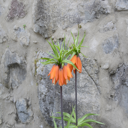

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

In [89]:

objs = iter(os.listdir(Path(root_dir)/"unlabelled"))
res = one_batch(learn, objs, 20)
new_path = Path(root_dir)/"temporary_acceptance"
paths,labels = [x[0] for x in res] , [x[1][0] for x in res]
loop = asyncio.get_running_loop()
button = Button(description='Submit')

dict_res = {}
async def f(dict_res, paths, labels):
    for i,path in enumerate(paths):
      print(paths[i])
      display(Image.open(paths[i]).resize((128,128)))
      selected = widgets.Select(
         options = ["Keep"] + list(dls.vocab),
         description = labels[i]
      )

      display(Box([selected, button]))
      x = await wait_for_change(button)

      if selected.value == "Keep":
         dict_res[paths[i]] = labels[i]
         # print(new_path/labels[i])
         # shutil.copy(path, new_path/labels[i])
      else:
         dict_res[paths[i]] = selected.value
      clear_output(wait=True)
asyncio.create_task(f(dict_res, paths, labels))


In [90]:

for i in dict_res.keys():
   label = dict_res[i]
   if not Path.exists(new_path/label): # sorted label
      os.mkdir(new_path/label)

   if not Path.exists(new_path/label): # add to training set
      os.mkdir(new_path/label)
   try:
      shutil.copy(i, path/label) #copying to the train set for next time
   except Exception as e:
      print("copy",e)
   try:
      shutil.move(i, new_path/label) #copying to the new_path
      # print("moved")
   except Exception as e:

      print("move",e)
   try:
      os.unlink(i)
      # print("removed")
   except Exception as e:
      print("rem", e)


rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20190809_132739.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20170513_095829.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/DSC_6424.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20170513_085221.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20170509_155013.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20191020 Zhouzhuang Water Town (84).jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20170510_131320.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20180826_161003.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20191010_144125.jpg'
rem [Errno 2] No such file or directory: '

## Checking what needs more examples

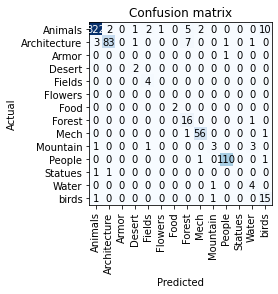

In [91]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [92]:

interp.most_confused()

[('Animals', 'birds', 10),
 ('Architecture', 'Forest', 7),
 ('Animals', 'Forest', 5),
 ('Architecture', 'Animals', 3),
 ('Mountain', 'Water', 3),
 ('Animals', 'Architecture', 2),
 ('Animals', 'Fields', 2),
 ('Animals', 'Mech', 2),
 ('Animals', 'Desert', 1),
 ('Animals', 'Flowers', 1),
 ('Architecture', 'Desert', 1),
 ('Architecture', 'People', 1),
 ('Architecture', 'Water', 1),
 ('Armor', 'People', 1),
 ('Forest', 'Water', 1),
 ('Mech', 'Forest', 1),
 ('Mech', 'birds', 1),
 ('Mountain', 'Animals', 1),
 ('Mountain', 'Fields', 1),
 ('People', 'Mech', 1),
 ('People', 'birds', 1),
 ('Statues', 'Animals', 1),
 ('Statues', 'Architecture', 1),
 ('Water', 'Mountain', 1),
 ('birds', 'Animals', 1),
 ('birds', 'Mountain', 1)]

- Statues, Armor, Birds, Mountain, Water
- Adding more of these examples manually...

# Again

In [ ]:
continue_train()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.291559,0.252510,0.056769,0.943231,00:49


/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.346884,0.290894,0.071325,0.928675,01:01
1,0.334561,0.165813,0.040757,0.959243,01:03
2,0.362822,0.207615,0.049491,0.950509,01:06
3,0.207334,0.195164,0.049491,0.950509,01:03


/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/eragon/mambaforge/envs/pytorcher/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/media/hdd/Datasets/Landscapes/unlabelled/DSC_7319.jpg


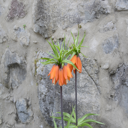

Box(children=(Select(description='Architecture', options=('Keep', 'Animals', 'Architecture', 'Armor', 'Desert'…

In [ ]:

objs = iter(os.listdir(Path(root_dir)/"unlabelled"))
res = one_batch(learn, objs, 20)
new_path = Path(root_dir)/"temporary_acceptance"
paths,labels = [x[0] for x in res] , [x[1][0] for x in res]
loop = asyncio.get_running_loop()
button = Button(description='Submit')

dict_res = {}
async def f(dict_res, paths, labels):
    for i,path in enumerate(paths):
      print(paths[i])
      display(Image.open(paths[i]).resize((128,128)))
      selected = widgets.Select(
         options = ["Keep"] + list(dls.vocab),
         description = labels[i]
      )

      display(Box([selected, button]))
      x = await wait_for_change(button)

      if selected.value == "Keep":
         dict_res[paths[i]] = labels[i]
         # print(new_path/labels[i])
         # shutil.copy(path, new_path/labels[i])
      else:
         dict_res[paths[i]] = selected.value
      clear_output(wait=True)
asyncio.create_task(f(dict_res, paths, labels))


In [ ]:

for i in dict_res.keys():
   label = dict_res[i]
   if not Path.exists(new_path/label): # sorted label
      os.mkdir(new_path/label)

   if not Path.exists(new_path/label): # add to training set
      os.mkdir(new_path/label)
   try:
      shutil.copy(i, path/label) #copying to the train set for next time
   except Exception as e:
      print("copy",e)
   try:
      shutil.move(i, new_path/label) #copying to the new_path
      # print("moved")
   except Exception as e:

      print("move",e)
   try:
      os.unlink(i)
      # print("removed")
   except Exception as e:
      print("rem", e)


rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20190809_132739.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20170513_095829.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/DSC_6424.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20170513_085221.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20170509_155013.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20191020 Zhouzhuang Water Town (84).jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20170510_131320.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20180826_161003.jpg'
rem [Errno 2] No such file or directory: '/media/hdd/Datasets/Landscapes/unlabelled/20191010_144125.jpg'
rem [Errno 2] No such file or directory: '